In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
!ls /data/readout/pkl/2016*

/data/readout/pkl/2016-01-08_165207_sweep_and_stream.pkl
/data/readout/pkl/2016-01-08_171459_sweep_and_stream.pkl
/data/readout/pkl/2016-01-08_204441_sweep_and_stream.pkl
/data/readout/pkl/2016-01-08_210106_sweep_and_stream.pkl
/data/readout/pkl/2016-01-08_213458_sweep_and_stream.pkl
/data/readout/pkl/2016-01-08_215515_sweep_and_stream.pkl
/data/readout/pkl/2016-01-08_220930_sweep_and_stream.pkl
/data/readout/pkl/2016-01-09_102858_sweep_and_stream.pkl
/data/readout/pkl/2016-01-09_215112_sweep_and_stream.pkl
/data/readout/pkl/2016-01-09_230458_sweep_and_stream.pkl
/data/readout/pkl/2016-01-09_234637_sweep_and_stream.pkl


In [2]:
import kid_readout.analysis.archive

/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


no data directory set up for clouds defaulting to /data
updated file list


In [3]:
import glob

In [5]:
fns = glob.glob('/artemis/readout/pkl/2016-01-0[89]*')
fns.sort()
print fns

['/artemis/readout/pkl/2016-01-08_165207_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-01-08_171459_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-01-08_204441_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-01-08_210106_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-01-08_213458_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-01-08_215515_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-01-08_220930_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-01-09_102858_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-01-09_215112_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-01-09_230458_sweep_and_stream.pkl', '/artemis/readout/pkl/2016-01-09_234637_sweep_and_stream.pkl']


In [6]:
df = kid_readout.analysis.archive.build_simple_archive(fns)

In [7]:
df.shape

(1632, 92)

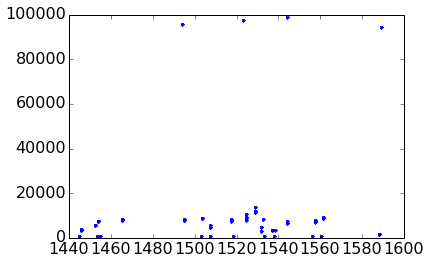

In [12]:
plot(df.f_0,df.Q,'.')

In [8]:
r9 = df[(df.resonator_id==9) & (df.timestream_modulation_duty_cycle==1.0) & (df.atten ==11)]

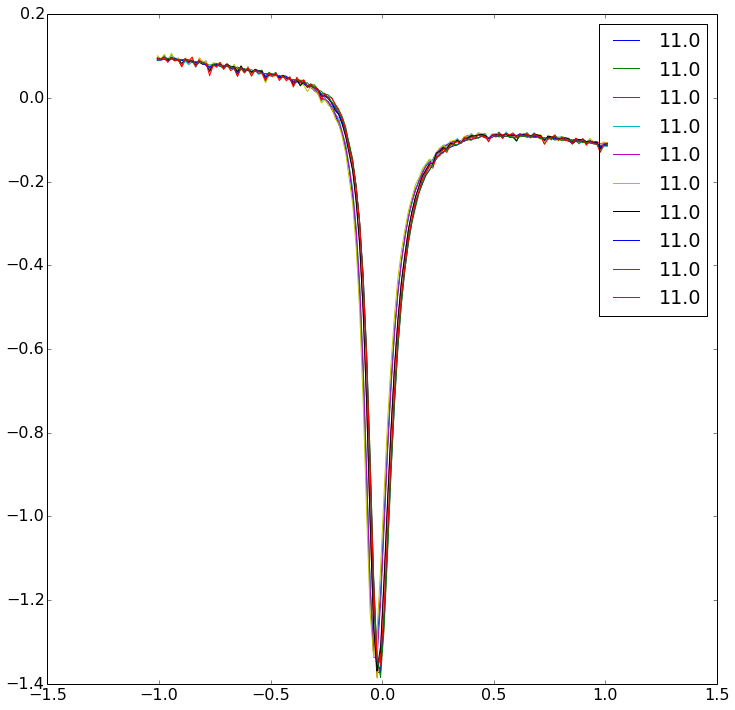

In [9]:
figure(figsize=(12,12))
for k,row in r9.iterrows():
    plot(row.sweep_freqs_MHz-row.sweep_freqs_MHz.mean(),20*np.log10(np.abs(row.sweep_s21)/row.A_mag),label=str(row.atten))
legend()

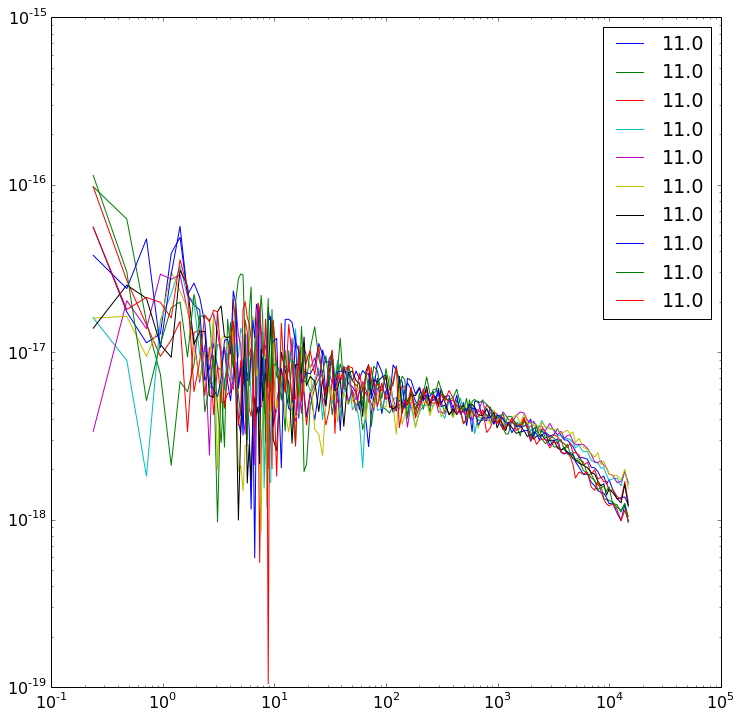

In [10]:
figure(figsize=(12,12))
for k,row in r9.iterrows():
    loglog(row.pca_freq,row.pca_eigvals[1,:]-row.pca_eigvals[0,:],label=str(row.atten))
#    loglog(row.pca_freq,row.pca_eigvals[0,:])
legend()

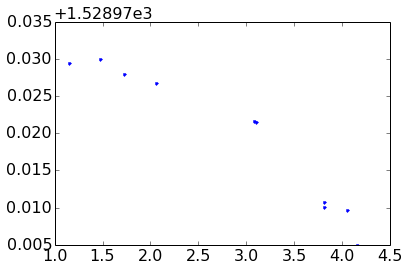

In [11]:
plot(r9.sweep_primary_load_temperature,r9.f_0,'.')

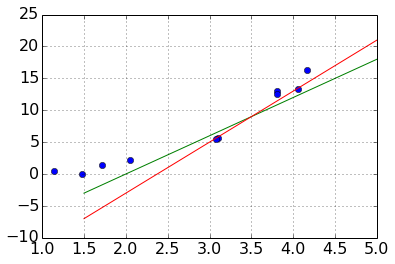

In [12]:
plot(r9.sweep_primary_load_temperature,1e6*(r9.f_0.max()-r9.f_0)/r9.f_0.max(),'o')
x = np.linspace(1.5,5,10)
plot(x,x*6-12)
plot(x,x*8-19)
grid()

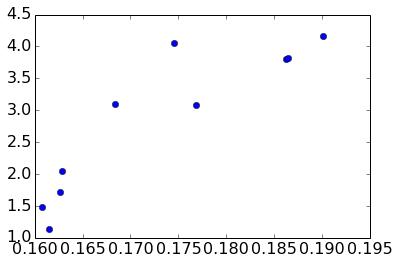

In [13]:
plot(r9.sweep_primary_package_temperature,r9.sweep_primary_load_temperature,'o')

In [14]:
r9.timestream_modulation_duty_cycle

169     1
329     1
489     1
649     1
809     1
969     1
1129    1
1289    1
1449    1
1609    1
Name: timestream_modulation_duty_cycle, dtype: float64

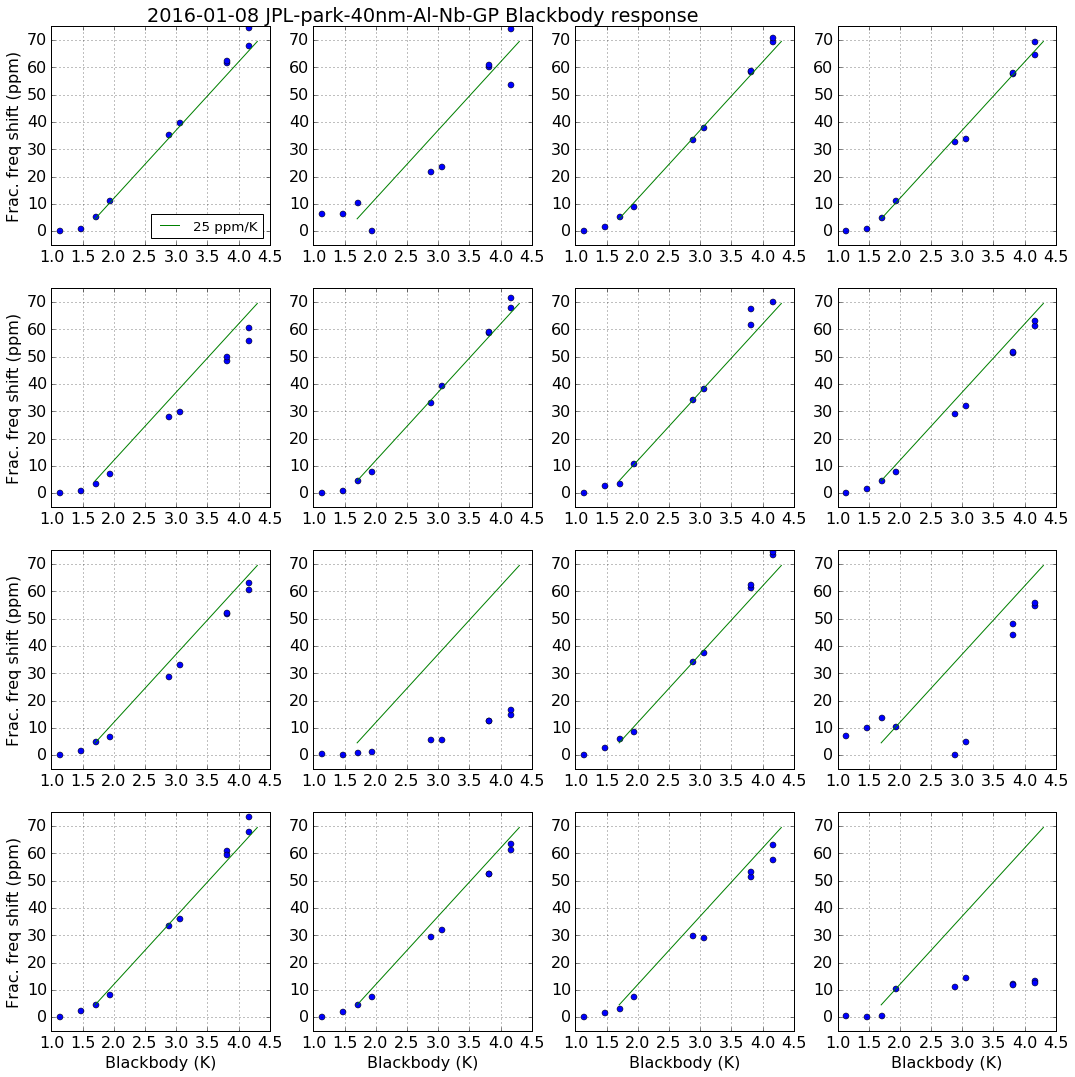

In [14]:
fig,axs = subplots(4,4,figsize=(18,18))
x = np.linspace(1.7,4.3,10)
for k in range(16):
    ax = axs.flatten()[k]
    dd = df[(df.resonator_id==k) & (df.timestream_modulation_duty_cycle==1.0) & (df.atten ==14)]
    ax.plot(dd.sweep_primary_load_temperature,1e6*(dd.f_0.max()-dd.f_0)/dd.f_0.max(),'o',label='')
    ax.plot(x,x*25-38,label='25 ppm/K')
    ax.grid()
    ax.set_ylim(-5,75)
axs[0,0].legend(loc='lower right',prop=dict(size='small'))
axs[0,1].set_title('2016-01-08 JPL-park-40nm-Al-Nb-GP Blackbody response')
for k in range(4):
    axs[k,0].set_ylabel('Frac. freq shift (ppm)')
    axs[-1,k].set_xlabel('Blackbody (K)')
plt.savefig('/artemis/readout/plots/2016-02-23-jpl-2015-10-park-40nm-al-nb-gp/2016-01-08-blackbody-response-panels.png',bbox_inches='tight')

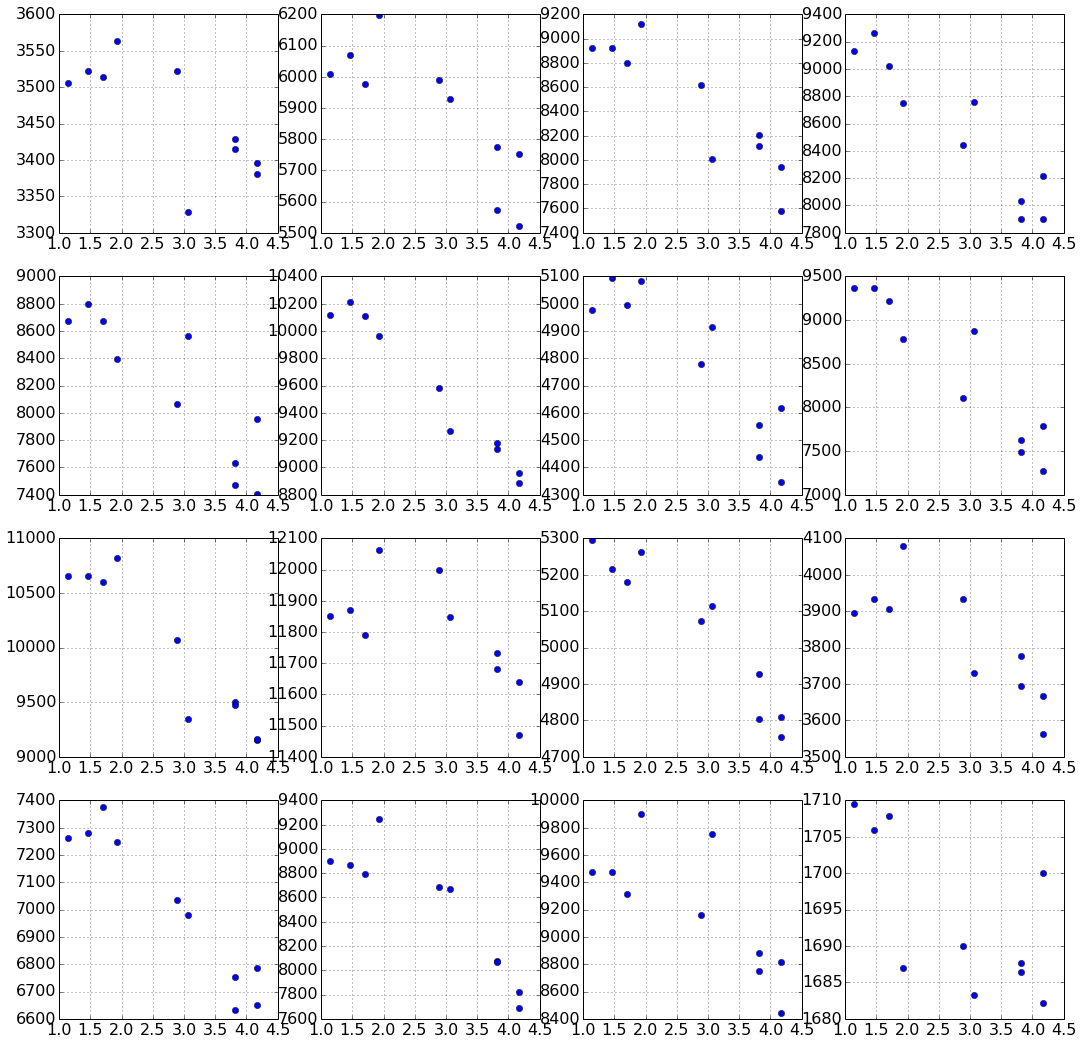

In [17]:
fig,axs = subplots(4,4,figsize=(18,18))
x = np.linspace(1.7,4.3,10)
for k in range(16):
    ax = axs.flatten()[k]
    dd = df[(df.resonator_id==k) & (df.timestream_modulation_duty_cycle==1.0) & (df.atten ==14)]
    ax.plot(dd.sweep_primary_load_temperature,dd.Q,'o')
#    ax.plot(x,x*25-50)
    ax.grid()
#    ax.set_ylim(-5,75)


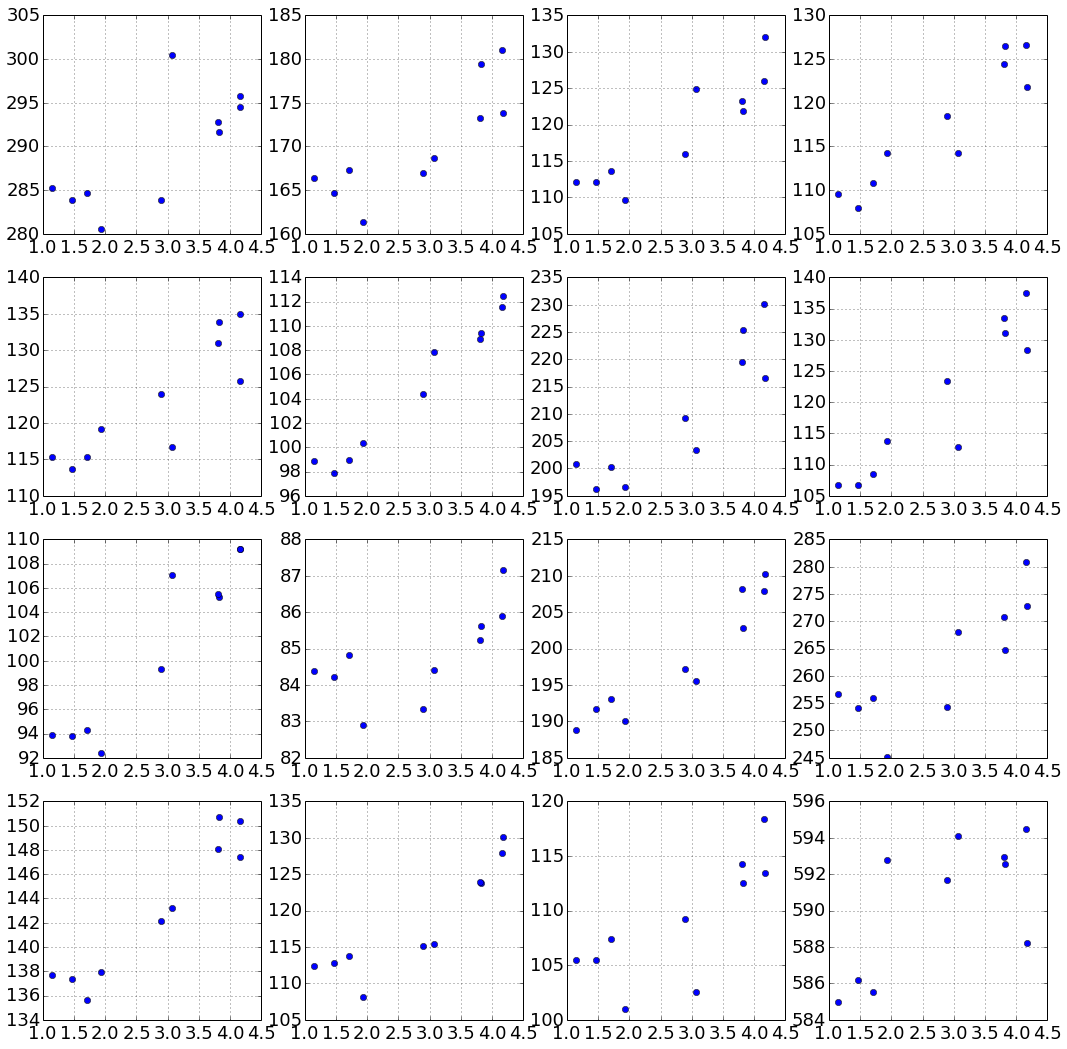

In [63]:
fig,axs = subplots(4,4,figsize=(18,18))
x = np.linspace(1.7,4.3,10)
for k in range(16):
    ax = axs.flatten()[k]
    dd = df[(df.resonator_id==k) & (df.timestream_modulation_duty_cycle==1.0) & (df.atten ==14)]
    ax.plot(dd.sweep_primary_load_temperature,1e6/dd.Q,'o')
#    ax.plot(x,x*25-50)
    ax.grid()
#    ax.set_ylim(-5,75)


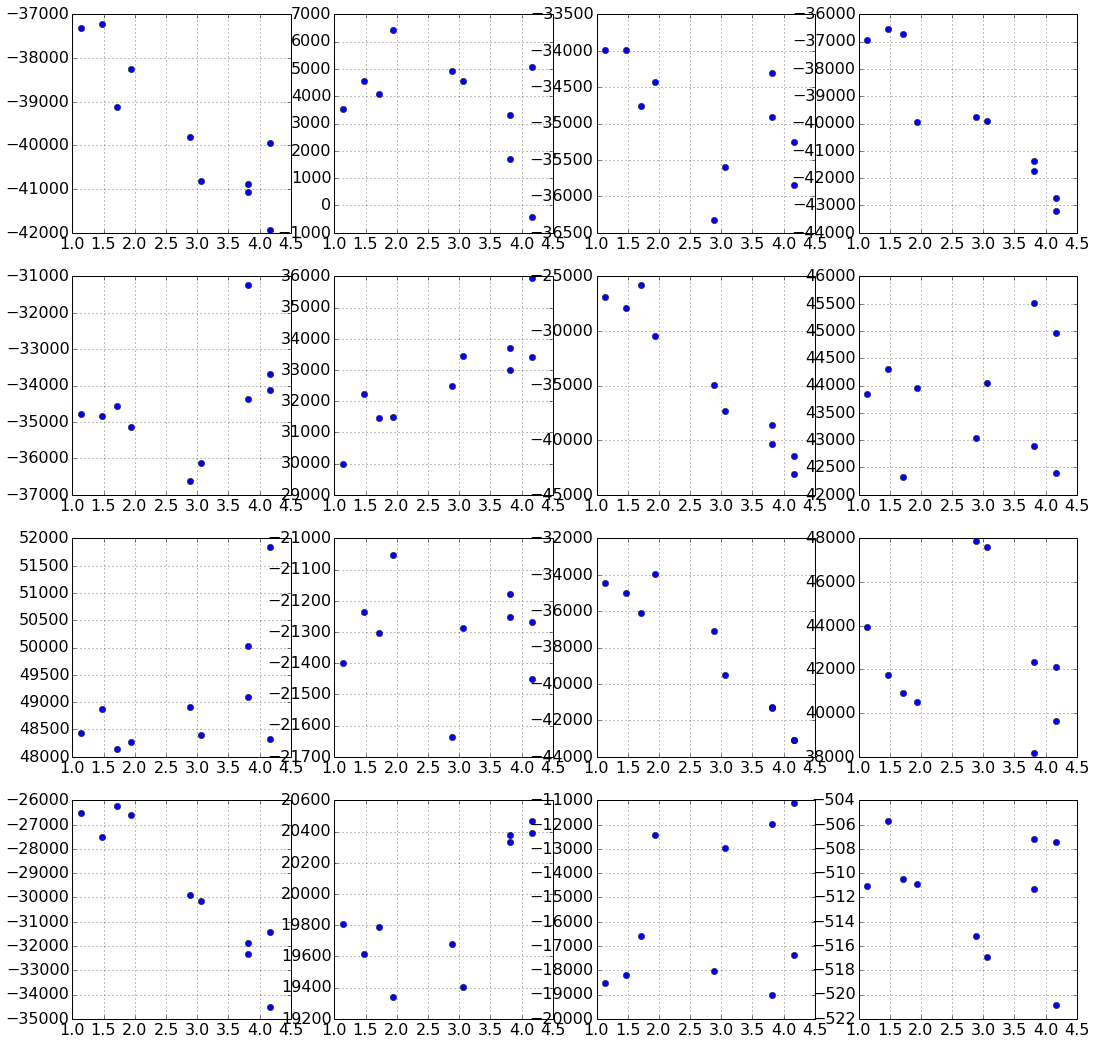

In [25]:
fig,axs = subplots(4,4,figsize=(18,18))
x = np.linspace(1.7,4.3,10)
for k in range(16):
    ax = axs.flatten()[k]
    dd = df[(df.resonator_id==k) & (df.timestream_modulation_duty_cycle==1.0) & (df.atten ==14)]
    ax.plot(dd.sweep_primary_load_temperature,dd.Q_e_imag,'o')
#    ax.plot(x,x*25-50)
    ax.grid()
#    ax.set_ylim(-5,75)


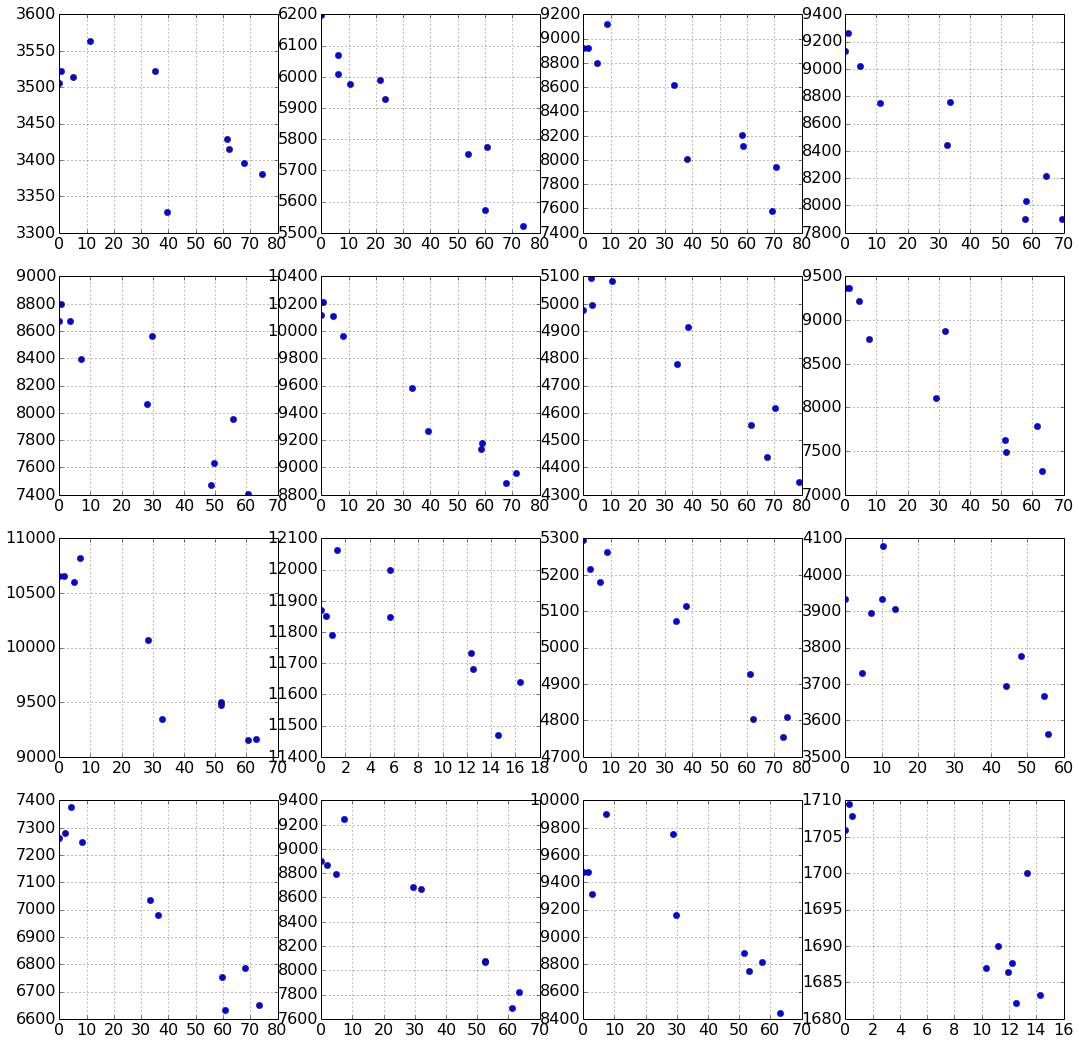

In [18]:
fig,axs = subplots(4,4,figsize=(18,18))
x = np.linspace(1.7,4.3,10)
for k in range(16):
    ax = axs.flatten()[k]
    dd = df[(df.resonator_id==k) & (df.timestream_modulation_duty_cycle==1.0) & (df.atten ==14)]
    ax.plot(1e6*(1-dd.f_0/dd.f_0.max()),dd.Q,'o')
#    ax.plot(x,x*25-50)
    ax.grid()
#    ax.set_ylim(-5,75)


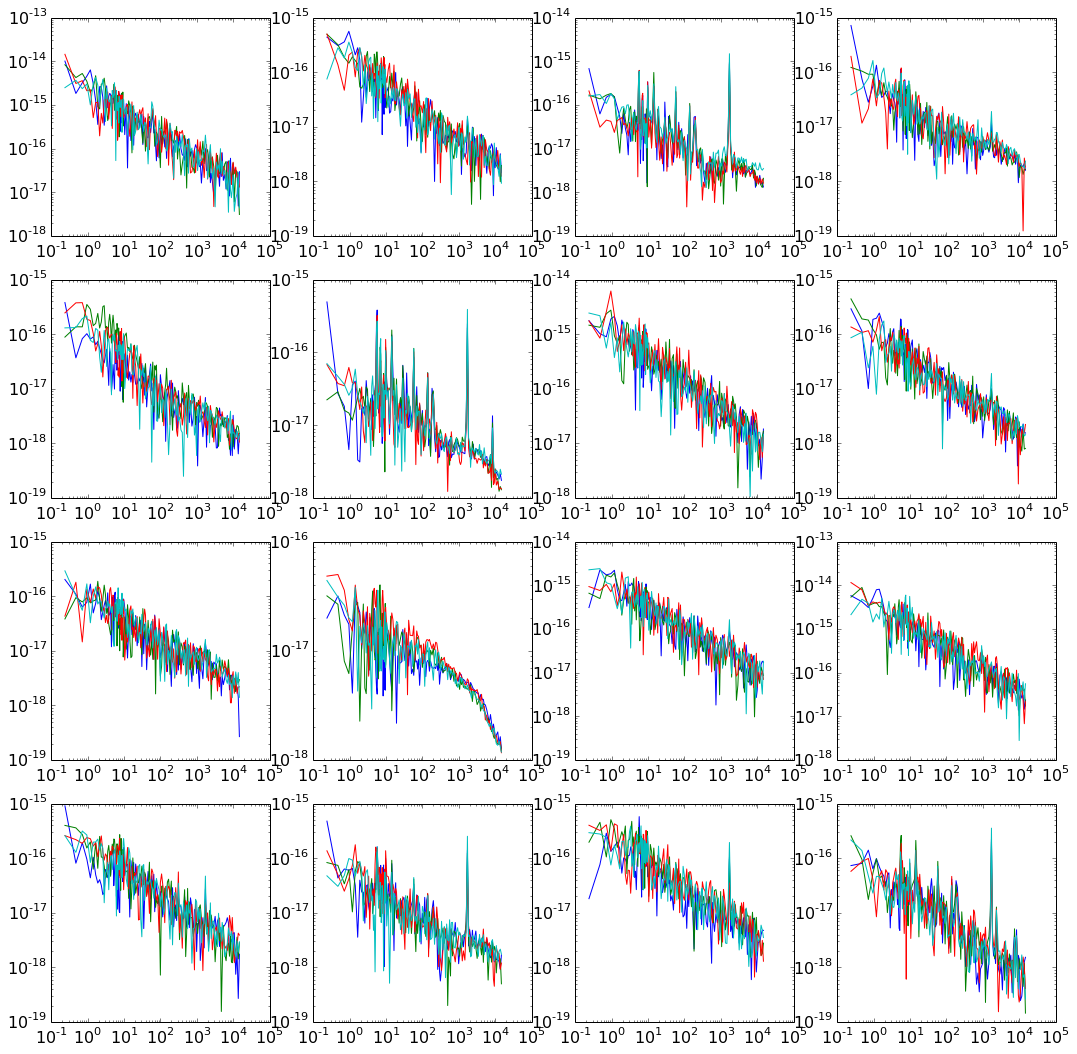

In [19]:
fig,axs = subplots(4,4,figsize=(18,18))
x = np.linspace(1.7,4.3,10)
for k in range(16):
    ax = axs.flatten()[k]
    dd = df[(df.resonator_id==k) & (df.timestream_modulation_duty_cycle==1.0) & (df.atten ==14) & (df.sweep_primary_load_temperature<2)]
    for mm,row in dd.iterrows():
        ax.loglog(row.pca_freq,row.pca_eigvals[1,:]-row.pca_eigvals[0,:])
#    ax.plot(x,x*25-50)
#    ax.grid()
#    ax.set_ylim(-5,75)


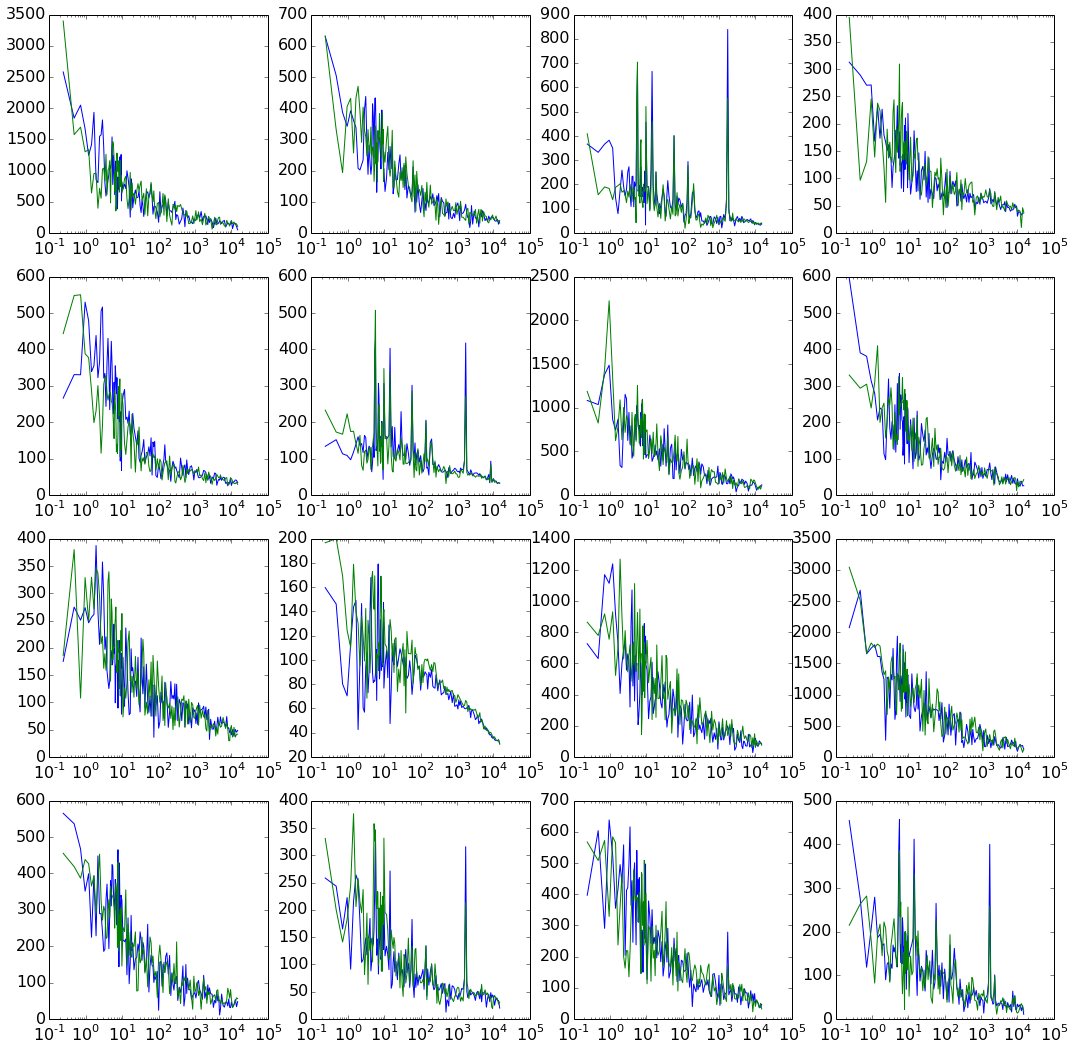

In [21]:
fig,axs = subplots(4,4,figsize=(18,18))
x = np.linspace(1.7,4.3,10)
for k in range(16):
    ax = axs.flatten()[k]
    dd = df[(df.resonator_id==k) & (df.timestream_modulation_duty_cycle==1.0) & (df.atten ==14) & (df.sweep_primary_load_temperature<1.5)]
    for mm,row in dd.iterrows():
        sxx = row.pca_eigvals[1,:]-row.pca_eigvals[0,:]
        nethz = np.sqrt(sxx)/25e-6
        ax.semilogx(row.pca_freq,1e6*nethz/np.sqrt(2))
#    ax.plot(x,x*25-50)
#    ax.grid()
#    ax.set_ylim(-5,75)


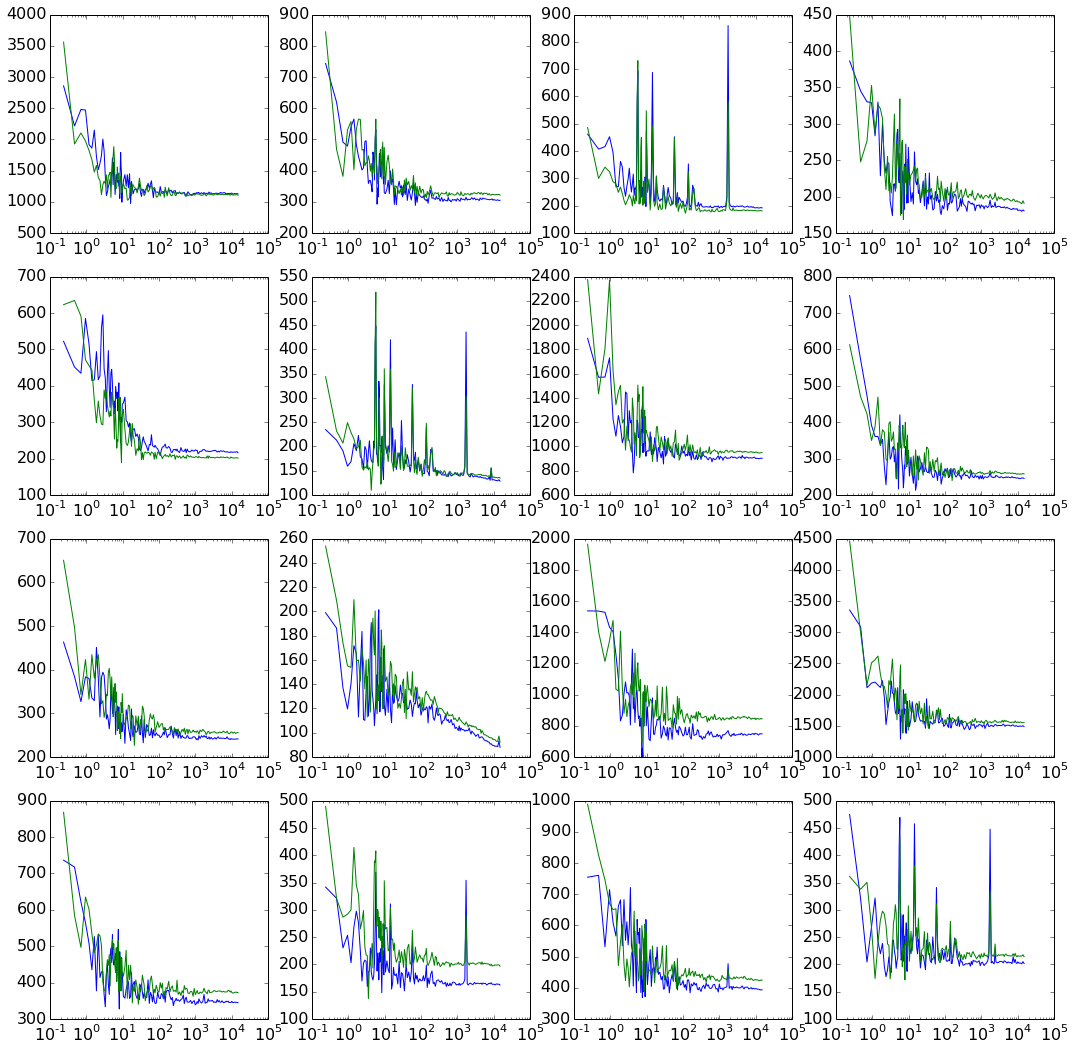

In [22]:
fig,axs = subplots(4,4,figsize=(18,18))
x = np.linspace(1.7,4.3,10)
for k in range(16):
    ax = axs.flatten()[k]
    dd = df[(df.resonator_id==k) & (df.timestream_modulation_duty_cycle==1.0) & (df.atten ==14) & (df.sweep_primary_load_temperature<1.5)]
    for mm,row in dd.iterrows():
        sxx = row.pca_eigvals[1,:]
        nethz = np.sqrt(sxx)/25e-6
        ax.semilogx(row.pca_freq,1e6*nethz/np.sqrt(2))
#    ax.plot(x,x*25-50)
#    ax.grid()
#    ax.set_ylim(-5,75)
